# M_files_chap01/figure1_18.m

Python 3 implementation of the MATLAB code from the book:

<b>DAFX - Digital Audio Effects</b> <br>
Edited by Udo Zölzer<br>
ISBN: 978-0-470-66599-2<br>
Second Edition, John Wiley & Sons, 2011<br>
Matlab files source: http://ant-s4.unibw-hamburg.de/dafx/DAFX_Book_Page_2nd_edition/matlab.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft
from scipy.io import wavfile
import IPython
from IPython.display import Audio
plt.style.use('ggplot')

In [2]:
AudioFileName = "ton2.wav"
IPython.display.Audio(AudioFileName)

In [3]:
# Load audio File
FS, u1 = wavfile.read(AudioFileName)
N=8192;

# creating cosine signal with freq = 1000 Hz
x=np.cos(2*np.pi*1000*np.arange(N)/44100)
# Blackman Window
W = signal.blackman(N)
W=N*W/sum(W) # scaling of window
f=(np.arange(N/2)/float(N))*float(FS) #frequency vector

# Windowing the signal
xw=x*W;

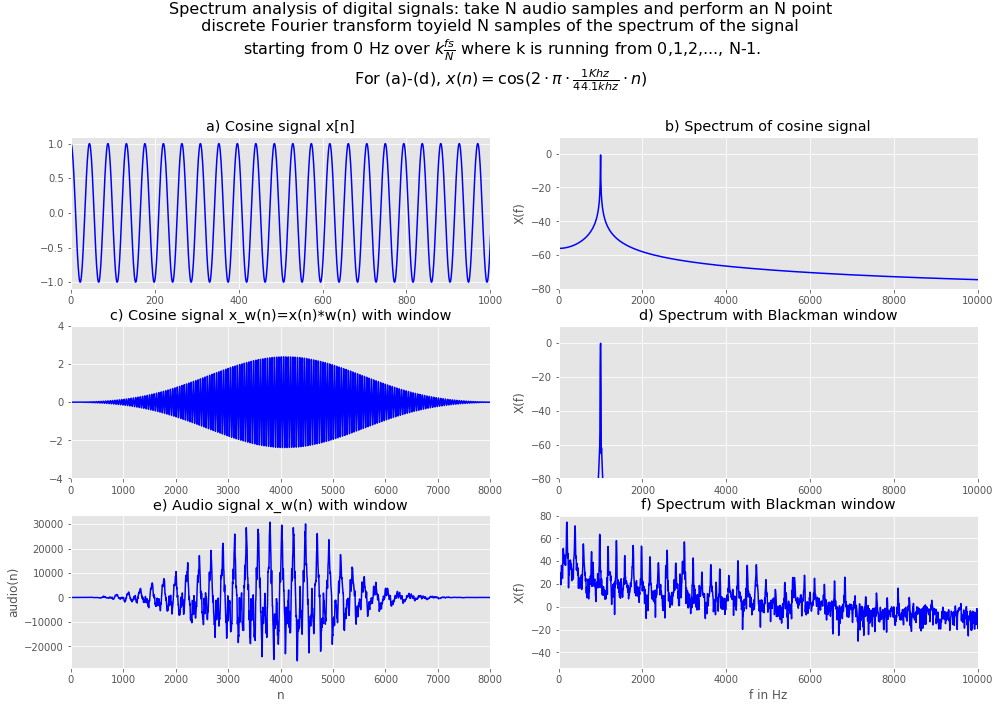

In [4]:
# Ploting Signals
plt.rcParams['figure.figsize'] = (14, 10)# figure size

plt.subplot(321)
plt.plot(x,'b')
plt.axis([0, 1000, -1.1, 1.1])
plt.title('a) Cosine signal x[n]')

plt.subplot(323)
plt.plot(xw,'b')
plt.axis([0, 8000, -4, 4])
plt.title('c) Cosine signal x_w(n)=x(n)*w(n) with window')


X=20*np.log10(np.abs(fft(x,N))/float(N/2));
plt.subplot(322)
plt.plot(f,X[:N/2],'b');
plt.axis([0, 10000, -80, 10]);
plt.ylabel('X(f)');
plt.title('b) Spectrum of cosine signal')

Xw=20*np.log10(np.abs(fft(xw,N))/float(N/2));
plt.subplot(324)
plt.plot(f,Xw[:N/2],'b');
plt.axis([0, 10000, -80, 10]);
plt.ylabel('X(f)');
plt.title('d) Spectrum with Blackman window')

s=u1[:N]*W;
plt.subplot(325)
plt.plot(s,'b');
plt.xlim([0, 8000]);
plt.ylabel('audio(n)');
plt.xlabel('n')
plt.title('e) Audio signal x_w(n) with window')


Sw=20*np.log10(np.abs(fft(s,N))/float(N/2))
plt.subplot(326)
plt.plot(f,Sw[:N/2],'b')
plt.xlim([0, 10000])
plt.ylabel('X(f)');
plt.title('f) Spectrum with Blackman window')
plt.xlabel('f in Hz')

plt.suptitle('Spectrum analysis of digital signals: take N audio samples and perform an N point\n discrete Fourier transform to'
             'yield N samples of the spectrum of the signal \n starting from 0 Hz over 'r'$k\frac{fs}{N}$'
             ' where k is running from 0,1,2,..., N-1. \n'
             'For (a)-(d),'r' $x(n)=\cos(2\cdot\pi\cdot\frac{1Khz}{44.1khz}\cdot n)$',size=16)

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()